<a href="https://colab.research.google.com/github/bartleyn/practice/blob/master/TabularQATransformerPipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [8]:
!pip install transformers
!pip install sentencepiece
!pip install pandas
!pip install torch-scatter

  Created wheel for torch-scatter: filename=torch_scatter-2.0.7-cp37-cp37m-linux_x86_64.whl size=292376 sha256=cb04f76729dc89a921ded8fcc11681f67cce58ed8d620b16138d5ed0b403fed1
  Stored in directory: /root/.cache/pip/wheels/d4/47/a3/b454bae87fa5c1631826bc9b15285622675eac6baf4096b484
Successfully built torch-scatter


## Imports

In [11]:
from transformers import AutoTokenizer pipeline, AutoModelForTableQuestionAnswering
import pandas as pd

## Loading Tokenizer & Model

If you want to make use of the different pre-trained models on huggingface, check out one of the various models [here](https://huggingface.co/models?filter=table-question-answering). When you go to an individual model card, click on "Use in Transformers":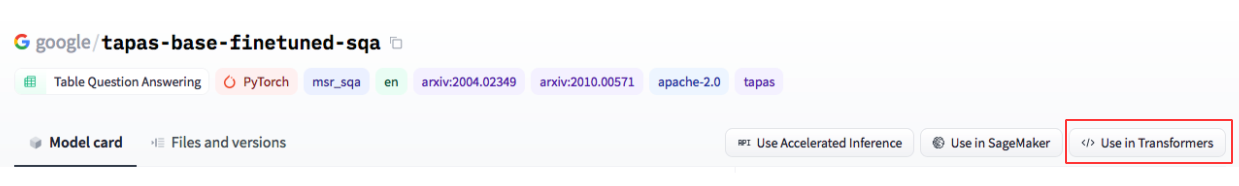

You will see example code you can use to load the model's tokenizer & model, and information about cloning it from the repo directly if you want to:

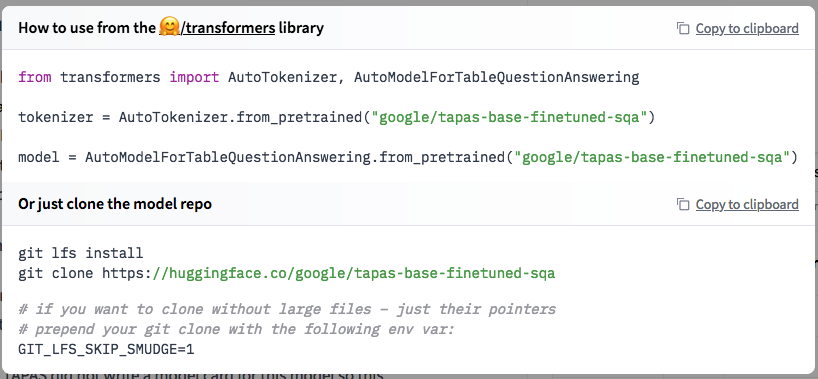

In [12]:
tokenizer = AutoTokenizer.from_pretrained("google/tapas-base-finetuned-sqa")

In [13]:
model = AutoModelForTableQuestionAnswering.from_pretrained("google/tapas-base-finetuned-sqa")

## Creating Pipeline for QA

In [ ]:
nlp = pipeline('table-question-answering', 
               model=model,
               tokenizer=tokenizer,
               )

## Using Pre-trained Pipeline on data

In [21]:
table_data_movies = pd.DataFrame.from_dict({
    "actors": ["brad pitt", "leonardo di caprio", "george clooney"],
    "age": ["56", "45", "59"],
    "number of movies": ["87", "53", "69"],
    "date of birth": ["7 february 1967", "10 june 1996", "28 november 1967"],
})

table_data_grades = {
    "student": ["nathan", "alex", "lauren", "adrienne"],
    "grade": ["83", "88", "93", "87"],
    "final exam score": ["90", "91", "94", "96"],
}

You can specify queries as either a ```str``` or ```List(str)```



In [22]:
query_movies = "How many movies was Leonardo Di Caprio in?"
query_movies = ["When was Brad Pitt born?", "How old is George Clooney?"]

query_grades = "What was Nathan's final exam score?"

In [23]:
nlp(table=table_data_movies, query=query_movies)

[{'answer': '7 february 1967',
  'cells': ['7 february 1967'],
  'coordinates': [(0, 3)]},
 {'answer': '59', 'cells': ['59'], 'coordinates': [(2, 1)]}]

In [25]:
nlp([{"table": table_data_movies, "query": query_movies}, 
    {"table": table_data_grades, "query": query_grades}])

[[{'answer': '7 february 1967',
   'cells': ['7 february 1967'],
   'coordinates': [(0, 3)]},
  {'answer': '59', 'cells': ['59'], 'coordinates': [(2, 1)]}],
 {'answer': '90', 'cells': ['90'], 'coordinates': [(0, 2)]}]